In [5]:
def gather_receipts_for(address):
    receipts = retrieve_receipt_dates_and_rev(values)
    return list(filter(lambda receipt: receipt['address'] == address,restaurants_receipts))

In [6]:
import json

# open output file for reading
with open('updated-reviews.json', 'r') as filehandle:  
    reviews = json.load(filehandle)

In [7]:
def dates(reviews):
    return [review['date'] for review in reviews]

In [8]:
def ratings(reviews):
    return [review['rating'] for review in reviews]

In [9]:
def make_series(reviews):
    import pandas as pd
    index = pd.DatetimeIndex(review_dates)
    
    data = pd.Series(review_ratings, index=index)
    return data

In [10]:
series = make_series(reviews)

In [11]:
df = series.to_frame()

In [12]:
start_date = df.sort_index().index[0]

In [13]:
import numpy as np
df['months_since_start'] = ((df.index - start_date)/np.timedelta64(1, 'M'))
df['months_since_start'] = df.months_since_start.round()

In [14]:
import pandas as pd

In [15]:
df.groupby(pd.Grouper(freq='M'))

In [16]:
df.groupby(pd.Grouper(freq='M'))

In [17]:
df.columns = ['rating', 'months_since_start']

In [24]:
grouped_rating = df.groupby(pd.Grouper(freq='M')).rating.mean()

In [25]:
grouped_count = df.groupby(pd.Grouper(freq='M')).rating.count()

In [26]:
grouped_data_df = grouped_rating.to_frame()

In [27]:
grouped_data_df['count'] = grouped_count

In [124]:
grouped_ratings = df.groupby(pd.Grouper(freq='Q')).rating.count()

In [122]:
photo_times_series = make_series(phototimes)
photo_times_series_df = photo_times_series.to_frame()
photo_times_series_df['count'] = 1
photo_count = photo_times_series_df.groupby(pd.Grouper(freq= 'Q'))['count'].count()

In [125]:
grouped_photos = photo_count

In [126]:
grouped_ratings_df = grouped_ratings.to_frame()

In [128]:
grouped_ratings_df['photo_count'] = grouped_photos

In [134]:
grouped_ratings_df = grouped_ratings_df[:'9/30/2017']

In [154]:
grouped_ratings_df[['rating', 'photo_count', 'total']].to_json('by_month_yelp_foursquare.json')

In [157]:
import numpy as np
import statsmodels.api as sm


count = np.array(grouped_ratings_df['photo_count']).reshape(-1, 1)
X = count
y = grouped_ratings_df['rating']

X2 = sm.add_constant(X)
model = sm.OLS(y, X2)
fitted_model = model.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     6.408
Date:                Wed, 10 Apr 2019   Prob (F-statistic):             0.0203
Time:                        15:57:52   Log-Likelihood:                -79.618
No. Observations:                  21   AIC:                             163.2
Df Residuals:                      19   BIC:                             165.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.8770      3.463      6.895      0.0

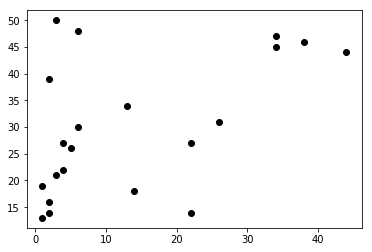

In [136]:


import matplotlib.pyplot as plt
count = np.array(grouped_ratings_df['photo_count']).reshape(-1, 1)
plt.scatter(count, grouped_ratings_df['rating'],  color='black')

In [140]:
total = grouped_ratings_df['rating'] + grouped_ratings_df['photo_count']

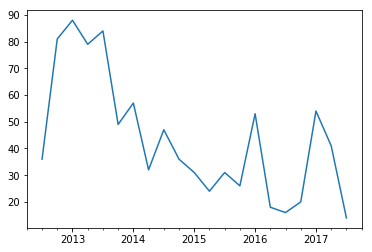

In [147]:
grouped_ratings_df.media_total.plot()

In [127]:
revenue_df = pd.read_csv('revenue_data.csv', index_col = 0)

In [38]:
revenue_df.index = pd.DatetimeIndex(revenue_df.index)

In [111]:
rating_df = df.groupby(pd.Grouper(freq='Q')).rating.mean()

In [112]:
count_df = df.groupby(pd.Grouper(freq='Q')).rating.count()

In [108]:
mean_revenue = revenue_df.groupby(pd.Grouper(freq='Q')).revenue.mean()

In [109]:
mean_revenue_df = mean_revenue.to_frame()

In [110]:
mean_revenue_df

,revenue
2016-06-30,66145.000000
2016-09-30,100368.000000
2016-12-31,108832.000000
2017-03-31,115909.000000
2017-06-30,94439.666667
2017-09-30,77461.333333
2017-12-31,98763.666667
2018-03-31,108539.333333
2018-06-30,89230.666667
2018-09-30,81963.333333


In [116]:
photo_count = photo_times_series_df.groupby(pd.Grouper(freq= 'Q'))['count'].count()

In [113]:
mean_revenue_df['rating'] = rating_df

In [114]:
mean_revenue_df['count'] = count_df

In [117]:
mean_revenue_df['photo_count'] = photo_count

In [118]:
mean_revenue_df

,revenue,rating,count,photo_count
2016-06-30,66145.000000,3.437500,16.0,2.0
2016-09-30,100368.000000,3.357143,14.0,2.0
2016-12-31,108832.000000,2.894737,19.0,1.0
2017-03-31,115909.000000,3.020833,48.0,6.0
2017-06-30,94439.666667,4.000000,39.0,2.0
2017-09-30,77461.333333,3.384615,13.0,1.0
2017-12-31,98763.666667,5.000000,1.0,NaN
2018-03-31,108539.333333,5.000000,2.0,NaN
2018-06-30,89230.666667,NaN,NaN,NaN
2018-09-30,81963.333333,NaN,NaN,NaN


In [70]:
mean_revenue_df.columns

Index(['revenue', 'rating', 'count'], dtype='object')

In [119]:
count = np.array(mean_revenue_df['count']).reshape(-1, 1)

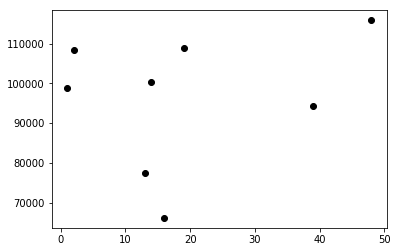

In [120]:
count = np.array(mean_revenue_df['count']).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.scatter(count, mean_revenue_df.revenue,  color='black')

In [85]:
import json

# open output file for reading
with open('phototimes.json', 'r') as filehandle:  
    phototimes = json.load(filehandle)

In [87]:
#phototimes

In [88]:
def make_series(photo_dates):
    import pandas as pd
    index = pd.DatetimeIndex(photo_dates)
    
    data = pd.Series(index=index)
    return data

In [91]:
photo_times_series = make_series(phototimes)
photo_times_series_df = photo_times_series.to_frame()
photo_times_series_df['count'] = 1
photo_count = photo_times_series_df.groupby(pd.Grouper(freq= 'M'))['count'].count()
# .groupby(pd.Grouper(freq= 'M')).count()